# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/trist/Documents/Cours/L3_MIASHS/Compléments_maths/S2/Projet/spotifyMusicGenresClean.csv")
df.head()

,genre,danceability,duration_ms,instrumentalness,key,liveness,speechiness,tempo,mode,valence
0,Rock,0.626561,0.418905,0.003211,10,0.031140,0.064748,0.384348,0,0.173305
1,Rock,0.303303,0.241046,0.000000,1,0.084078,0.107696,0.639850,1,0.215285
2,Rock,0.506360,0.312728,0.000080,0,0.077308,0.068672,0.589810,1,0.228202
3,Rock,0.452678,0.416564,0.006166,1,0.061197,0.023763,0.729532,1,0.589882
4,Rock,0.691913,0.111424,0.000000,8,0.122665,0.074559,0.413965,1,0.822390


In [2]:
# My target is genre
y = df.genre.values

categorical_variables = ["mode", "key"]
quantitative_variables = ["danceability","duration_ms","instrumentalness","liveness","speechiness","tempo","valence"]

X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

In [4]:
from sklearn.preprocessing import OneHotEncoder

# On transforme les variables qualitatives en dummy (numérique)
one_hot_encoder = OneHotEncoder()
X_qualitative_dummy = one_hot_encoder.fit_transform(X_categorical)
X_all = np.concatenate([X_quantitative, X_qualitative_dummy.toarray()], axis=1)

# On part sur un KNNImputer, car nous avons montré dans la partie 2 que celui-ci est relativement
# efficace 
# On prend k=1 car nous avons des variables qualitatives

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=1)
X_all_imputed = knn_imputer.fit_transform(X_all)

# Regarder les valeurs aberrantes grâce à mes boxplots

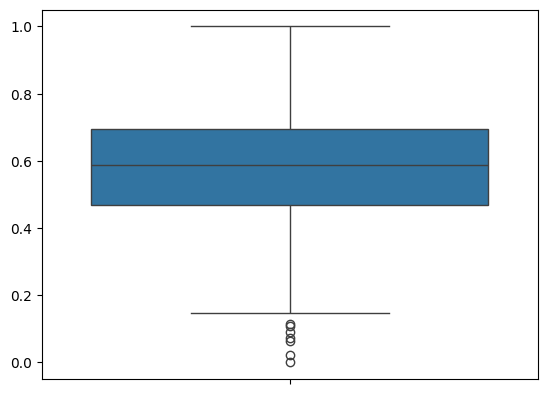

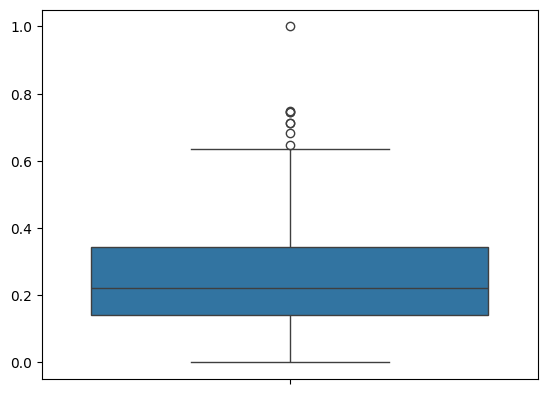

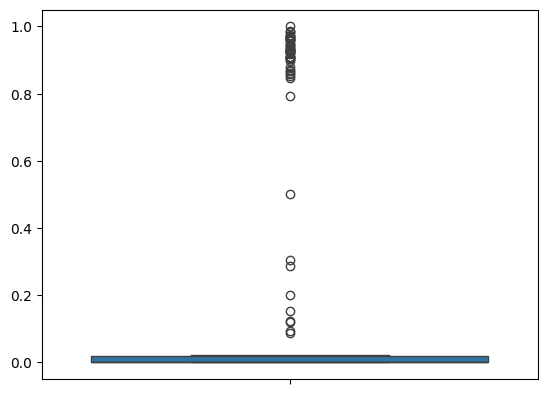

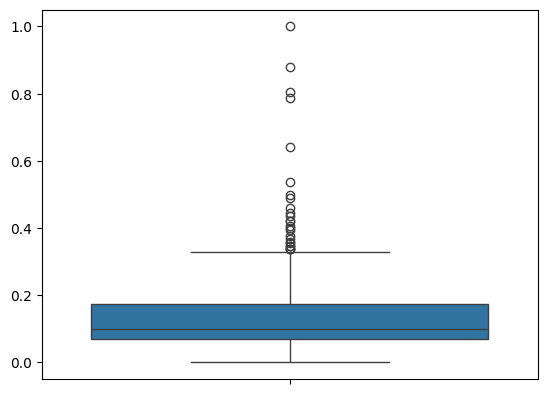

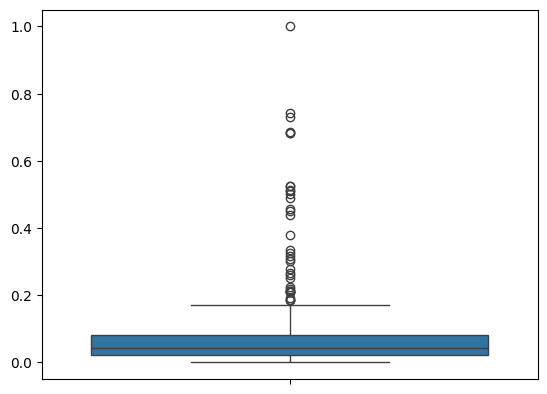

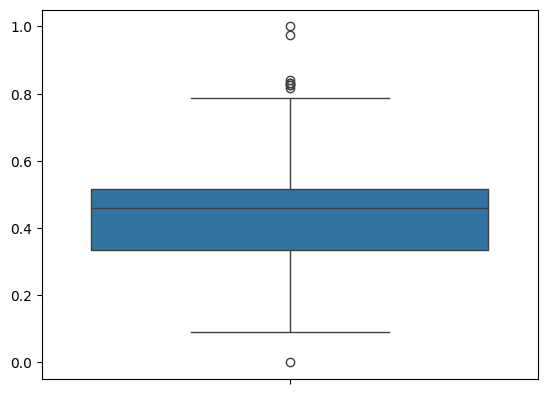

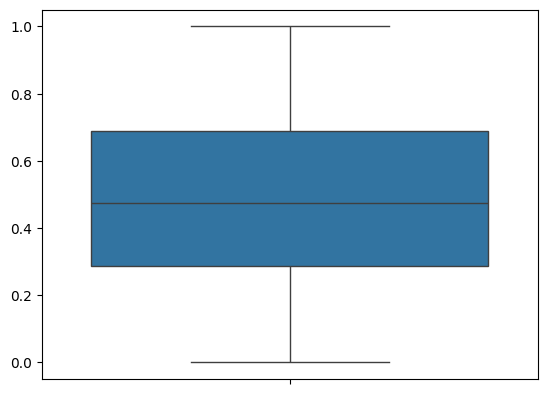

In [5]:
for X_val in X_quantitative.T:
    sns.boxplot(X_val)
    plt.show()
    
# Après l'examen des boxplots, je ne vois pas de valeur aberrantes.

In [6]:
# Jeu de donnée propre à la fin de mon étape 1:
X_preprocessed = X_all

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data
k = 11
======= Train KNN
======= Predict on training data
k = 13
======= Train KNN
======= Predict on training data
k = 15
======= Train KNN
======= Predict on training data
k = 17
======= Train KNN
======= Predict on training data
k = 19
======= Train KNN
======= Predict on training data
k = 21
======= Train KNN
======= Predict on training data
k = 23
======= Train KNN
======= Predict on training data
k = 25
======= Train KNN
======= Predict on training data
k = 27
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data


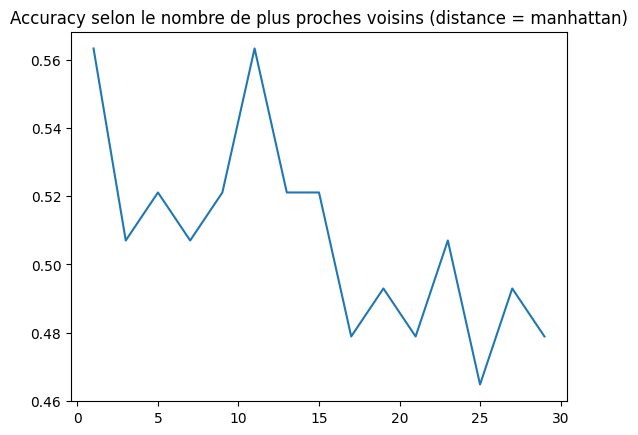

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_scores_man = []

for k in neighbors:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    print("======= Train KNN")
    knn.fit(X_train, y_train)
    print("======= Predict on training data")
    prediction = knn.predict(X_test)
    accuracy_scores_man.append(accuracy_score(prediction, y_test))

plt.plot(neighbors, accuracy_scores_man)
plt.title("Accuracy selon le nombre de plus proches voisins (distance = manhattan)")
plt.show()

k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data
k = 29
======= Train KNN
======= Predict on training data


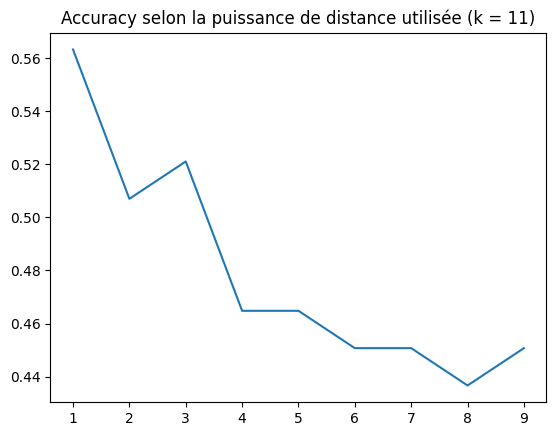

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

puissance = [1,2,3,4,5,6,7,8,9]
accuracy_scores_man = []

for p in puissance:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=11, p=p)
    print("======= Train KNN")
    knn.fit(X_train, y_train)
    print("======= Predict on training data")
    prediction = knn.predict(X_test)
    accuracy_scores_man.append(accuracy_score(prediction, y_test))

plt.plot(puissance, accuracy_scores_man)
plt.title("Accuracy selon la puissance de distance utilisée (k = 11)")
plt.show()

In [19]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

# Création et entraînement du modèle k-NN
k = 11
knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
knn_classifier.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_classifier.predict(X_test)

# Calcul des différentes métriques
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")
print("-------------")
precision = precision_score(y_test, y_pred, average = 'macro')
print("Precision:", precision*100, "%")
print("-------------")
recall = recall_score(y_test, y_pred, average = 'macro')
print("Recall:", recall*100, "%")

Accuracy: 56.33802816901409 %
-------------
Precision: 58.23529411764705 %
-------------
Recall: 55.27272727272727 %


In [20]:
print(y_pred)
print("------")
print(y_test)

['Country' 'Rock' 'Rock' 'Rap' 'Rock' 'Country' 'Classical' 'Rap' 'Rock'
 'Classical' 'Rock' 'Classical' 'Rock' 'Rap' 'Rock' 'EDM' 'EDM' 'Rock'
 'EDM' 'Country' 'Rock' 'Classical' 'Country' 'Rock' 'Classical' 'Country'
 'Country' 'Classical' 'EDM' 'EDM' 'EDM' 'Rock' 'Classical' 'Classical'
 'EDM' 'EDM' 'Country' 'Rock' 'Country' 'EDM' 'EDM' 'EDM' 'Rap' 'Rock'
 'Rap' 'Rock' 'Country' 'Classical' 'Country' 'Country' 'Country' 'EDM'
 'Classical' 'Country' 'Classical' 'Country' 'EDM' 'EDM' 'EDM' 'Rock'
 'Country' 'Classical' 'Rap' 'Rock' 'Country' 'EDM' 'Rock' 'EDM' 'Country'
 'Rap' 'Rap']
------
['EDM' 'Rock' 'Rock' 'Rock' 'Country' 'Rock' 'Classical' 'Rap' 'Rap'
 'Classical' 'Rock' 'Classical' 'Rock' 'EDM' 'EDM' 'EDM' 'Rap' 'Country'
 'Country' 'Rock' 'Rock' 'Classical' 'Country' 'Rock' 'Classical'
 'Country' 'Country' 'Classical' 'Rap' 'Rock' 'EDM' 'Country' 'Classical'
 'Classical' 'EDM' 'EDM' 'Country' 'Rock' 'Country' 'EDM' 'Country'
 'Country' 'Rap' 'Rap' 'Rap' 'Country' 'Country' '